# 문제정의

후생노동청으로부터 2015년의 일본 인구 동태통계에 의하면 사망자의 약 60%가 생활습관병이 원인이 되고 있습니다.  
생활습관병은 불규칙한 식습관과 수면패턴이 주로 원인이 되고있으며, 대표적인 생활습관병으로는 고혈압, 당뇨병, 치매등이 있습니다.  
특히, 세계적으로도 당뇨병자수가 급증하고있으며, 국제당뇨병연합은 2045년에 환자수가 6.3억명으로 증가한다고 예상하고있습니다.  
초기에 발견되지 않는다면 합병증인 뇌경색이나 심근경색증 등이 발생될 수 있습니다.   
조기발견이나 자가진단을 통한 지속적인 관리가 필요합니다.
당뇨병에 있어서 자가진단을 통해 중요한 요인을 인지하고 위험 수치에 달하게 된다면 신속히 치료할 수 있다고 생각됩니다. 



## 그림1. 사망원인 - 생활습관병

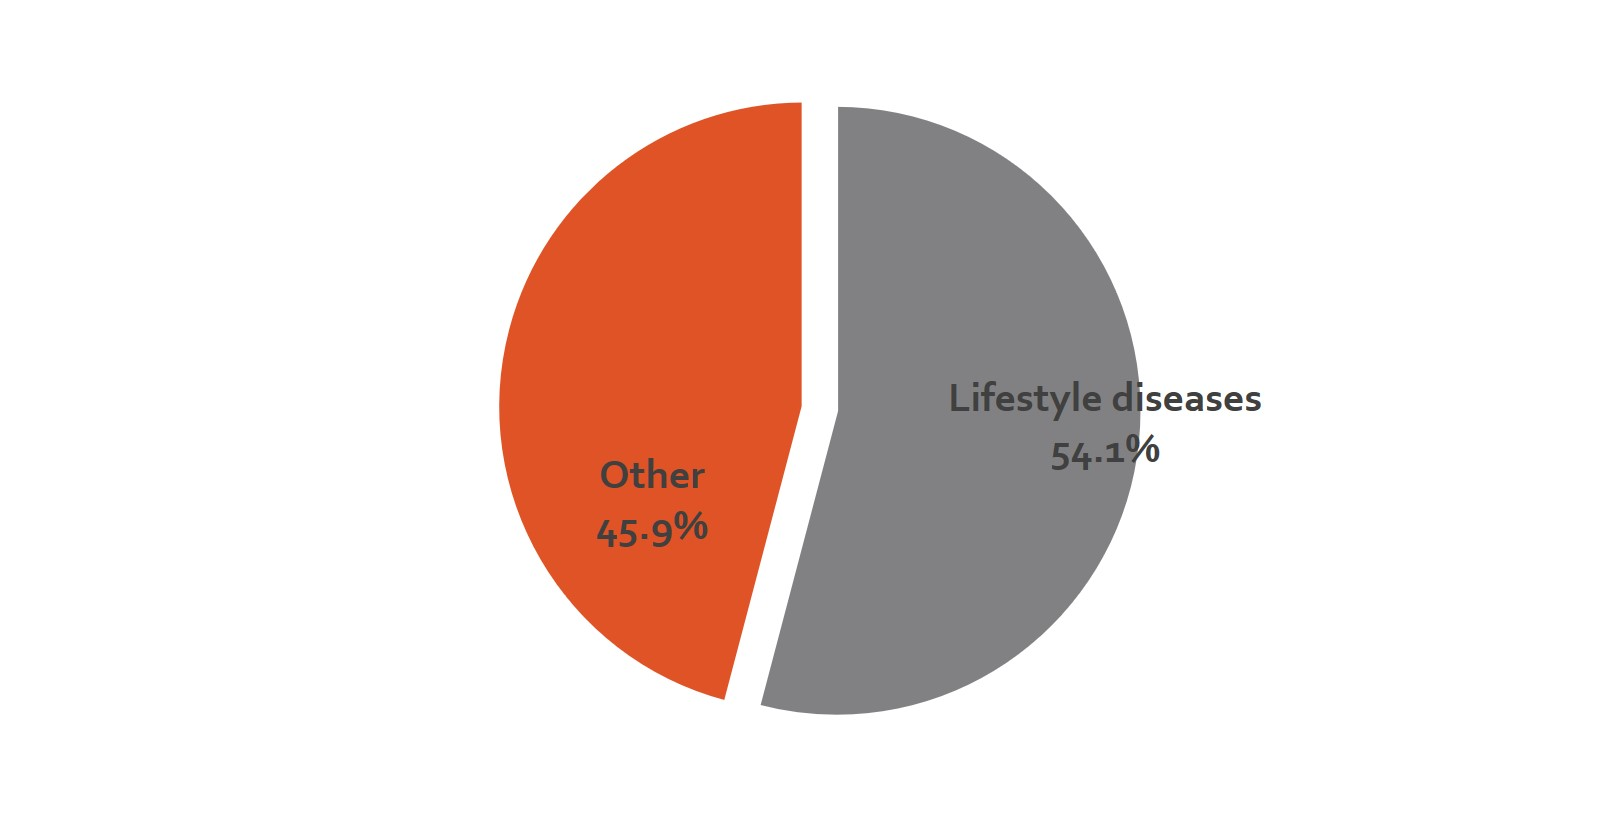

In [2]:
from IPython.display import Image
Image("data/related_disease.JPG")

Fig.1：The demographic statistics of Japan, 2015   
(source : Demographic Statistics, Ministry of Health, 2015  

# 데이터 설명

당뇨병에 있어서 중요한 요인이라고 생각되는 항목을 선별하기 위해서는 일반 정상인들과 당뇨병환자들의 수치들이 들어 있는 Pima Indians의 데이터를 사용했습니다.  
Pima Indian 데이터는 Kaggle에 있는 오픈 데이터셋으로, 21살 이상의 여성을 대상으로 하여 정상인 500명과 당뇨병환자 268명으로 총 768명에 대한 데이터입니다.   
데이터 항목으로는 임신횟수, 글루코스, 혈압, 피부두께, 인슐린, BMI, 당뇨병유전지수, 연령으로 총 8개의 항목으로 이루어져있는 진단 데이터입니다. 


# 데이터 가져오기

In [2]:
import pandas as pd

df = pd.read_excel("data/pima_data.xlsx")

print("Data Size:",len(df))

df.describe()

Data Size: 768


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 데이터 전처리

일반적인 데이터를 분석하기위해서 특정하게 크거나 작은 이상치를 제거하기위해서 1-class SVM을 이용해서 10퍼센트(nu = 0.9)로 설정하였습니다.  
Matlab R2019a를 이용해서 정상인과 당뇨병환자를 나누어서 이상치를 검출하였습니다.  
그 결과, 정상인 452명, 당뇨병환자 243명에 대한 분석을 진행하게 되었습니다.  
    
파이썬 코드로 변환하면, 

In [3]:
X = df[df.columns[:-1]]
y = df['Outcome']

In [4]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [5]:
import numpy as np
from sklearn.svm import OneClassSVM

clf = OneClassSVM(nu=0.092, max_iter=100000).fit(X_scaled)
outlier = clf.predict(X_scaled)
pd.Series(clf.predict(X_scaled)).value_counts()

 1    695
-1     73
dtype: int64

In [6]:
df['outlier'] = outlier

In [7]:
# outlier가 아닌 데이터만 필터해서 가져온다
normal_df = df.loc[df['outlier'] == 1]

In [16]:
normal_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outlier
0,1,85,66,29,0,26.6,0.351,31,0,1
1,1,89,66,23,94,28.1,0.167,21,0,1
2,5,116,74,0,0,25.6,0.201,30,0,1
4,4,110,92,0,0,37.6,0.191,30,0,1
6,1,103,30,38,83,43.3,0.183,33,0,1


X, y 데이터 나누기

In [10]:
#전체
X = normal_df[df.columns[:-2]]
y = normal_df['Outcome']

전처리된 데이터를 전체, 정상인만, 당뇨병환자만의 3가지로 분류할 수 있습니다.

In [11]:
normal_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'outlier'],
      dtype='object')

In [14]:
health_df = normal_df.loc[normal_df['Outcome'] == 0]
health_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outlier
0,1,85,66,29,0,26.6,0.351,31,0,1
1,1,89,66,23,94,28.1,0.167,21,0,1
2,5,116,74,0,0,25.6,0.201,30,0,1
4,4,110,92,0,0,37.6,0.191,30,0,1
6,1,103,30,38,83,43.3,0.183,33,0,1


In [15]:
diabetes_df = normal_df.loc[normal_df['Outcome'] == 1]
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,outlier
500,6,148,72,35,0,33.6,0.627,50,1,1
501,8,183,64,0,0,23.3,0.672,32,1,1
503,3,78,50,32,88,31.0,0.248,26,1,1
506,10,168,74,0,0,38.0,0.537,34,1,1
508,5,166,72,19,175,25.8,0.587,51,1,1


정상인 데이터

In [17]:
X0 = health_df[health_df.columns[:-2]]
y0 = health_df['Outcome']

당뇨병 환자

In [18]:
X1 = diabetes_df[diabetes_df.columns[:-2]]
y1 = diabetes_df['Outcome']

데이터를 모델링하기 전에 X에 대해서 StandardScaler통한 스케일링

In [19]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [20]:
X_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.880334,-1.161853,-0.236630,0.556001,-0.764427,-0.818295,-0.345798,-0.160856
1,-0.880334,-1.028422,-0.236630,0.163828,0.184462,-0.590256,-1.006487,-1.052361
2,0.369579,-0.127767,0.247248,-1.339499,-0.764427,-0.970321,-0.884404,-0.250006
3,0.057100,-0.327912,1.335973,-1.339499,-0.764427,0.853994,-0.920311,-0.250006
4,-0.880334,-0.561416,-2.414080,1.144259,0.073422,1.720544,-0.949036,0.017445


# 기초분석

## T-test
두 집단의 평균이 유의미한지를 t검정을 통해 파악하였습니다.

정상인과 당뇨병환자를 나눠 T-test를 진행하였습니다.

In [23]:
X_columns = normal_df.columns[:-2]

당뇨병환자

In [24]:
df1 = normal_df.loc[normal_df['Outcome']==1,X_columns]

정상인

In [25]:
df0 = normal_df.loc[normal_df['Outcome']==0,X_columns]

정상인과 당뇨병환자 feature의 평균값

In [26]:
mean_df = pd.concat([df0.mean(),df1.mean()],axis = 1)
mean_df.columns = ['normal','diabetes']

print(mean_df)

                              normal    diabetes
Pregnancies                 3.310195    4.816239
Glucose                   109.596529  139.991453
BloodPressure              68.689805   72.320513
SkinThickness              20.008677   21.448718
Insulin                    68.470716   90.021368
BMI                        30.638395   34.630769
DiabetesPedigreeFunction    0.408514    0.523722
Age                        30.739696   36.871795


#### 두 집단의 평균 차이가 통계적으로 유의미한지 t-검증  
p_value < 0.05이면, 두 집단의 평균 차이는 통계적으로 유의미하다

In [27]:
import scipy.stats

result = scipy.stats.ttest_ind(df0, df1, equal_var=False)
pd.DataFrame(result.pvalue,index=X_columns,columns=['p_value'])



,p_value
Pregnancies,2.427500e-08
Glucose,8.712320e-34
BloodPressure,9.129551e-03
SkinThickness,2.637800e-01
Insulin,1.210494e-02
BMI,1.888147e-15
DiabetesPedigreeFunction,1.519436e-06
Age,5.083804e-12


#### 검증 결과,  
#### SkinThickness의 p_value는 0.05보다 크므로 해당 피쳐에 대해서는 두 집단(정상인과 당뇨병환자)의 평균 차이는 통계적으로 유의미하지 않습니다.

## 상관분석
두 요인이 서로 상관이 있는지 상관분석을 통해 검정하였습니다.  

### 정상인들을 대상으로 한 상관분석

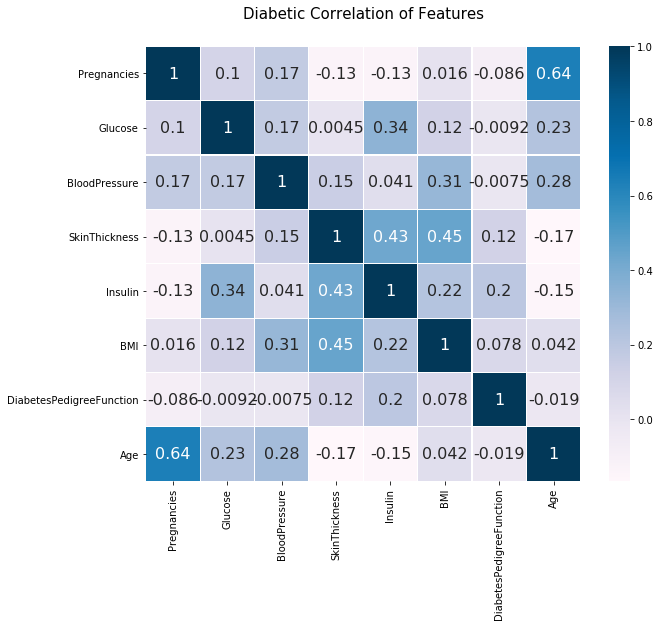

In [26]:
import matplotlib.pyplot as plt 
import seaborn as sns

colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("Diabetic Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(df0.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})


#### 정상인에 대한 상관분석 결과에 의하면,  
#### 임신횟수와 연령, BMI와피부두께, 인슐린과피부두께가 서로 밀접하게 관련되어 있다고 볼 수 있습니다.  

### 당뇨병 환자들을 대상으로 한 상관분석

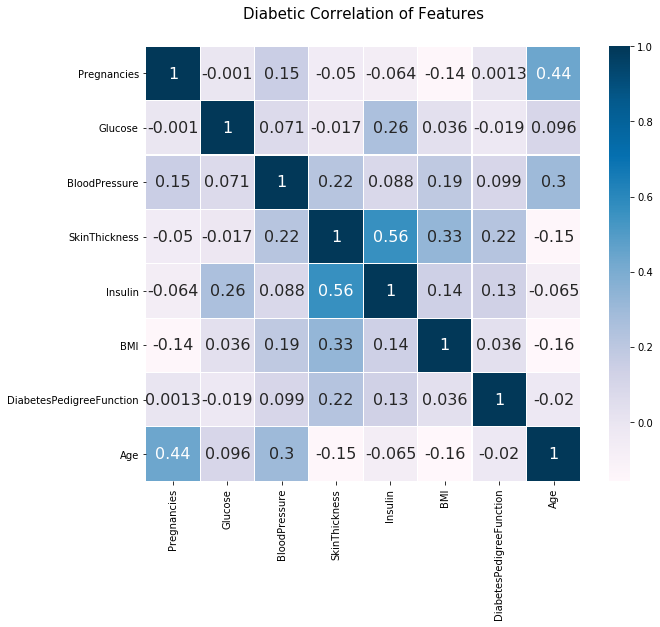

In [27]:
import matplotlib.pyplot as plt 
import seaborn as sns

colormap = plt.cm.PuBu 
plt.figure(figsize=(10, 8)) 
plt.title("Diabetic Correlation of Features", y = 1.05, size = 15) 
sns.heatmap(df1.astype(float).corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})


#### 당뇨병 환자에 대한 상관분석 결과에 의하면,  
#### 임신횟수와 연령, 인슐린과 피부두께가 서로 밀접하게 관련되어 있다고 볼 수 있으며,
#### 정상인과의 차이점으로는 인슐린과 피부두께의 상관성이 더 높고, BMI와 피부두께와의 상관성은 낮아졌다는것을 알 수 있습니다.

## 그래피컬라소
#### 당뇨병과 정상인사이의 요인간의 관계 파악을 위해 그래피컬라소로 시각화 함  

그래피컬라소란,  
다변량정규분포의 복잡한구조인 파라미터를 그래프구조로서 변형시켜 이상감지를 추출할수있는 방법중의 하나로  
집단간의 이상감지와 요인간의 의존관계를 효율적으로 분석할 수 있는게 가장 큰 장점입니다.  
또한, 그래프구조에서의 요인간의 변화를 확인하고 각 요인에 대한 변화값도 비교할 수 있습니다.  
(변수간의 관계성을 그래프로 표시할수있어 변수간의 특징이나 차이점을 쉽게 알 수 있다.  
또, 각 항목간의 상관이 있으면 그래프상에 선을 표시해서 변수간의 상관성을 확인 할수 있다.) 

#### 그래피컬라소는 MATLAB으로 진행하였으며, 아래 MATLAB코드를 참고하면 됨

clear;
load ('diabetes.mat');  
%X=AA;  
%[Y]=X(:,end);  
tic  
%%  
%[Y] = SVMModel_c1.predictFcn(X(:,1:end-1));  
%%  
%x_1 = X(Y==0, 1:end-1);  
%x_2 = X(Y==1, 1:end-1);  
rho = 0.2;  
i = []; % 항목  
y_1(:,i)=[];  
y_2(:,i)=[];  
%==============================================  
[LambdaO_1, S_1] = graphic_lasso(y_1, rho);%정상인  
[LambdaO_2, S_2] = graphic_lasso(y_2, rho);%당뇨병 환자  
%% ==============================================
% close all;  
epss = 0.00001; %lambda 설정값  
glasso_graph(LambdaO_1, epss);  
glasso_graph(LambdaO_2, epss);  
%% ==============================================  
Lambda_1 = LambdaO_1;  
% Lambda_1(abs(Lambda_1)<epss) = 0;  
Lambda_2 = LambdaO_2;  
% Lambda_2(abs(Lambda_2)<epss) = 0;  
%==============================================  
[a_12] = [];  
[LSL_1] = Lambda_1*S_1*Lambda_1;  
[LSL_2] = Lambda_2*S_1*Lambda_2;  
for i = 1:size(Lambda_1,1)  
   a_12(i,1) = 1/2 * log(Lambda_1(i,i)/Lambda_2(i,i)) ...  
            -1/2 * (LSL_1(i,i)/Lambda_1(i,i) - LSL_2(i,i)/Lambda_2(i,i));  
end  
%==============================================  
[a_21] = [];  
[LSL_1] = Lambda_2*S_2*Lambda_2;  
[LSL_2] = Lambda_1*S_2*Lambda_1;  
for i = 1:size(Lambda_1,1)  
   a_21(i,1) = 1/2 * log(Lambda_2(i,i)/Lambda_1(i,i)) ...  
            -1/2 * (LSL_1(i,i)/Lambda_2(i,i) - LSL_2(i,i)/Lambda_1(i,i));  
end  
% toc  
[degree_abnormal] = max([a_12 a_21], [], 2);%변화도  

Pima Indian 중에서 정상인과 당뇨병 환자를 구분해서 그래피컬라소로 나타내어    
당뇨병 환자에게는 요인간의 관계를 파악하고 정상인과의 다른점을 비교할 수 있습니다.    
당뇨병에 있어서 영향이 큰 요인을 조사하기 위해 정상인에서 당뇨병환자에서의 각 요인의 변화도를 측정하였습니다.  

### 정상인결과

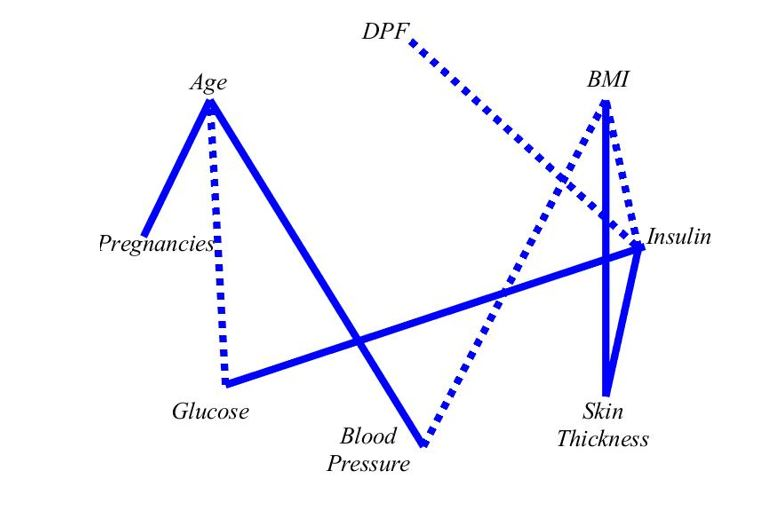

In [8]:
from IPython.display import Image  
Image("data/healthy_GL.JPG")  

### 당뇨병 결과

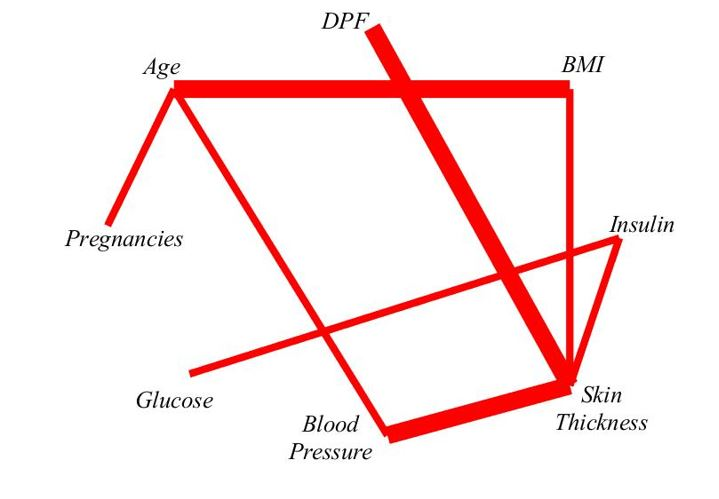

In [9]:
from IPython.display import Image  
Image("data/diabetes_GL.JPG")  

정상인과 당뇨병환자의 두 그래프를 비교하면,    
정상인 그래프에서의 점선은 요인간의 관계의 상관성이 낮음을 보여주며  
당뇨병 환자 그래프에서 정상인 그래프와 비교했을때, 새로운 선은 요인간의 관계의 상관성이 정상인과 비교했을때 더 높은 관계로  
두꺼운 선으로 표시되었습니다.  
  
두꺼운선을 봤을때, 정상인과 비교하여 당뇨병환자한테 피부두께와 혈압, 피부두께와 당뇨병유전지수, BMI와연령간의 관계가 높은 것을 알 수 있습니다.  
특히, BMI와 연령은 변화값도 높은 결과가 나왔습니다.   

## 요인분석

데이터의 차원을 축소해서 각 주성분에 차지되는 요인을 알기위해 요인분석을 사용했습니다.  
요인 분석시 초기값 설정에 따라 계산 속도가 많이 영향을 받기 때문에 요인 추출 방법으로 주성분분석을 활용해서 초기값을 제어할 수 있습니다.  
요인행렬의 열을 단순화시키는 방식으로 베리맥스 방법을 이용하면 변수와 요인간의 관계가 명확해져 해석하기 쉽기 때문에 해당 방법을 이용하여 요인분석을 진행하였습니다.

### 당뇨병 환자에 대한 요인분석

### KMO와 Bartlett의 검정

#### Bartlett 검정
Bartlett검정은 요인분석 모형의 적합성 여부를 나타냅니다
요인분석 모형으로서 적합한지 아닌지는 유의확률로서 파악하게 되며
귀무가설은 "상관관계 행렬이 단위행렬이다"이며 귀무가설이 기각되어야지만 요인분석 모델을 사용할 수 있습니다.
예를 들어 유의확률이 0.05보다 작으면 귀무가설을 기각할 수 있으며, 요인분석이 적절하다라고 할 수 있습니다

In [36]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(df1)
chi_square_value, p_value

(274.53020379523343, 2.650799977945653e-42)

Bartlett검정의 결과로 p_value가 0.05보다 작아 귀무가설을 기각할 수 있으며, 요인분석이 적절하다고 할 수 있습니다.

#### KMO검정
KMO는 변수들 간의 상관관계가 다른변수에 의해 잘 설명되는지 정도를 나타내는 값으로,   
이 값이 작으면 요인분석을 위한 변수들의 선정이 적절치 못했다는 의미로 볼 수 있습니다.  

일반적으로 KMO값이 0.9이상이면 상당히 좋고,  
0.8-0.89면 꽤 좋은편, 0.7-0.79는 적당한 편, 0.6-0.69는 평범한 편,  
0.5-0.59는 바람직하지 못한편, 0.5 미만이면 받아들일 수 없는 수치로 판단합니다  

In [37]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df1)
kmo_model
# Value of KMO less than 0.6 is considered inadequate.

0.5224646419833954

KMO값이 0.52로 요인분석을 위한 변수 선정이 바람직하지 못한 편이지만,
받아들일 수 없는 수치는 아니기 때문에 요인분석을 진행하였습니다

#### 요인분석 

In [38]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(n_factors=3, method="principal", rotation="varimax")
fa.fit(df1)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

In [39]:
fa.loadings_

array([[-0.09207064,  0.74748219, -0.04712589],
       [-0.14931909,  0.0824223 ,  0.87098272],
       [ 0.45756808,  0.57561917,  0.02178662],
       [ 0.82344966, -0.06767844,  0.21347766],
       [ 0.52396147, -0.07952157,  0.64329258],
       [ 0.58179765, -0.16241091,  0.01452436],
       [ 0.48541392,  0.09158835, -0.15801379],
       [-0.15223407,  0.83357483,  0.07756885]])

In [40]:
efa_result= pd.DataFrame(fa.loadings_, index=df1.columns)
efa_result

,0,1,2
Pregnancies,-0.092071,0.747482,-0.047126
Glucose,-0.149319,0.082422,0.870983
BloodPressure,0.457568,0.575619,0.021787
SkinThickness,0.823450,-0.067678,0.213478
Insulin,0.523961,-0.079522,0.643293
BMI,0.581798,-0.162411,0.014524
DiabetesPedigreeFunction,0.485414,0.091588,-0.158014
Age,-0.152234,0.833575,0.077569


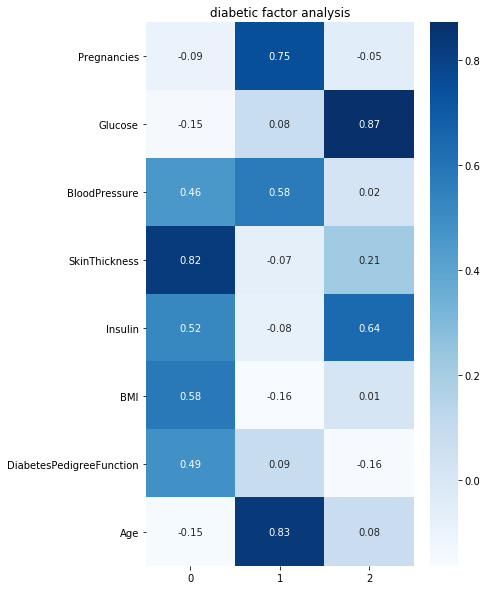

In [42]:
import seaborn as sns
plt.figure(figsize=(6,10))
plt.title('diabetic factor analysis' )
sns.heatmap(efa_result,cmap="Blues",  annot=True, fmt='.2f')

위 히트맵에서 당뇨병 환자들 대상으로 각 성분마다 차지하고 있는 feature에 대해서 볼 수 있으며,
제1성분 skin thickness, BMI, DiabetesPedigreeFunction   
제2성분 age, pregnancies, BloodPressure  
제3성분 Glucose, Insulin   
으로 feature가 나눠질 수 있습니다.  

제1성분은 비만으로 관련된 요인,  
제2성분은 연령에 관련된 요인,  
제3성분은 혈당에 관련된 요인으로 볼 수 있습니다.

### 정상인에 대한 요인분석

#### Bartlett 검정

In [35]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value = calculate_bartlett_sphericity(df0)
chi_square_value, p_value

(699.2316550318192, 2.8352160063295805e-129)

#### KMO검정

In [36]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df0)
kmo_model

0.5616251134778683

#### 요인분석

In [37]:
from factor_analyzer import FactorAnalyzer
fa1 = FactorAnalyzer(n_factors=3, method="principal", rotation="varimax")
fa1.fit(df0)

FactorAnalyzer(method='principal', rotation='varimax', rotation_kwargs={})

In [38]:
fa1.loadings_

array([[-0.00211984,  0.8100154 , -0.11289479],
       [-0.07301161,  0.40381   ,  0.74874779],
       [ 0.57795236,  0.44945778, -0.03221167],
       [ 0.73925609, -0.26949776,  0.25363312],
       [ 0.26144985, -0.16919382,  0.80663816],
       [ 0.82180576,  0.05951653,  0.10083924],
       [ 0.07111867, -0.14009047,  0.36522808],
       [ 0.00348463,  0.87923496, -0.02378952]])

In [39]:
efa1_result= pd.DataFrame(fa1.loadings_, index=df0.columns)
efa1_result

,0,1,2
Pregnancies,-0.002120,0.810015,-0.112895
Glucose,-0.073012,0.403810,0.748748
BloodPressure,0.577952,0.449458,-0.032212
SkinThickness,0.739256,-0.269498,0.253633
Insulin,0.261450,-0.169194,0.806638
BMI,0.821806,0.059517,0.100839
DiabetesPedigreeFunction,0.071119,-0.140090,0.365228
Age,0.003485,0.879235,-0.023790


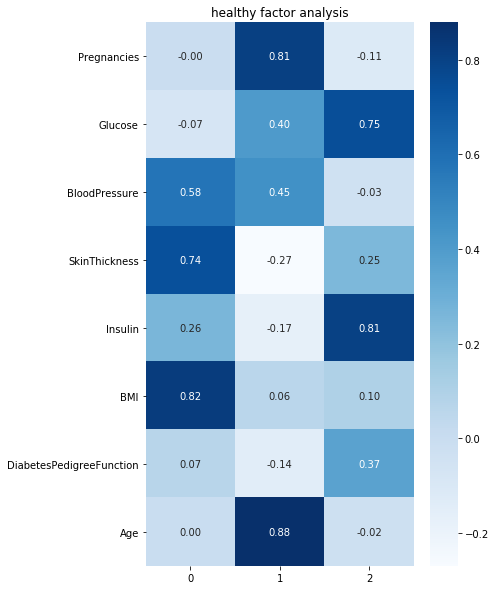

In [40]:
plt.figure(figsize=(6,10))
plt.title('healthy factor analysis')
sns.heatmap(efa1_result, cmap="Blues", annot=True, fmt='.2f')

정상인들 대상으로 각 성분마다 차지하고 있는 feature에 대해서 볼 수 있으며,  
제1성분 skin thickness, BMI, BloodPressure  
제2성분 age, pregnancies  
제3성분 Glucose, Insulin, DiabetesPedigreeFunction   
으로 feature가 나눠질 수 있습니다.  

제1성분은 비만으로 관련된 요인, 제2성분은 연령에 관련된 요인, 제3성분은 혈당에 관련된 요인으로 볼 수 있습니다.  
이는 당뇨병 환자와 비슷한 요인분석 결과를 보여줍니다

### 클러스터 분석
각 요인들의 특성이나 성질이 비슷하면 군집을 이루는 성질을 이용해서 8개의 요인들을 군집화하였습니다.  
클러스터 분석에서 크기가 비슷한 클러스터를 형성시키기 위해서 ward법을 이용했습니다.  

#### 전체 데이터에 대한 클러스터분석 결과

In [44]:
# feature끼리의 비선형적인 관계를 보기 위해 데이터 구조를 변환한다
clustering_df = normal_df[normal_df.columns[:-2]].T

In [45]:
clustering_df

,0,1,2,4,6,7,8,9,10,11,...,757,758,759,760,762,763,764,765,766,767
Pregnancies,1.000,1.000,5.000,4.000,1.000,3.000,8.000,1.000,13.000,5.000,...,1.000,3.000,6.000,4.000,8.000,1.000,0.000,6.000,9.000,1.000
Glucose,85.000,89.000,116.000,110.000,103.000,126.000,99.000,97.000,145.000,117.000,...,147.000,187.000,162.000,136.000,154.000,128.000,123.000,190.000,170.000,126.000
BloodPressure,66.000,66.000,74.000,92.000,30.000,88.000,84.000,66.000,82.000,92.000,...,94.000,70.000,62.000,70.000,78.000,88.000,72.000,92.000,74.000,60.000
SkinThickness,29.000,23.000,0.000,0.000,38.000,41.000,0.000,15.000,19.000,0.000,...,41.000,22.000,0.000,0.000,32.000,39.000,0.000,0.000,31.000,0.000
Insulin,0.000,94.000,0.000,0.000,83.000,235.000,0.000,140.000,110.000,0.000,...,0.000,200.000,0.000,0.000,0.000,110.000,0.000,0.000,0.000,0.000
BMI,26.600,28.100,25.600,37.600,43.300,39.300,35.400,23.200,22.200,34.100,...,49.300,36.400,24.300,31.200,32.400,36.500,36.300,35.500,44.000,30.100
DiabetesPedigreeFunction,0.351,0.167,0.201,0.191,0.183,0.704,0.388,0.487,0.245,0.337,...,0.358,0.408,0.178,1.182,0.443,1.057,0.258,0.278,0.403,0.349
Age,31.000,21.000,30.000,30.000,33.000,27.000,50.000,22.000,57.000,38.000,...,27.000,36.000,50.000,22.000,45.000,37.000,52.000,66.000,43.000,47.000


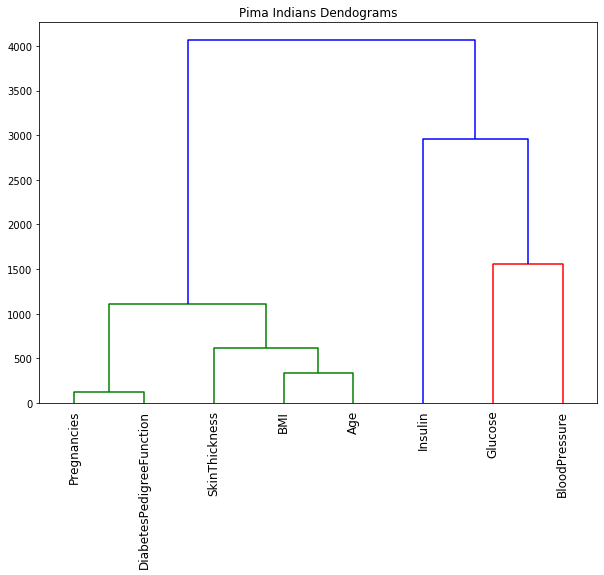

In [46]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Pima Indians Dendograms")
dend = shc.dendrogram(shc.linkage(clustering_df, method='ward'),labels=clustering_df.index)
plt.xticks(rotation=90)
plt.show()

In [47]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_result = cluster.fit_predict(clustering_df)

In [48]:
den_df = pd.DataFrame([clustering_df.index.tolist(),clustering_result.tolist()]).T
den_df.columns = ['feature_name','cluster']
den_df.sort_values(by=['cluster'])

,feature_name,cluster
1,Glucose,0
2,BloodPressure,0
0,Pregnancies,1
3,SkinThickness,1
5,BMI,1
6,DiabetesPedigreeFunction,1
7,Age,1
4,Insulin,2


In [49]:
den_df['feature_name'] = den_df['feature_name'] + ", "

In [50]:
den_df.groupby('cluster')['feature_name'].sum()

cluster
0                             Glucose, BloodPressure, 
1    Pregnancies, SkinThickness, BMI, DiabetesPedig...
2                                            Insulin, 
Name: feature_name, dtype: object

#### 당뇨병환자들에 대한 클러스터분석결과

In [51]:
clustering0_df = diabetes_df[diabetes_df.columns[:-2]].T

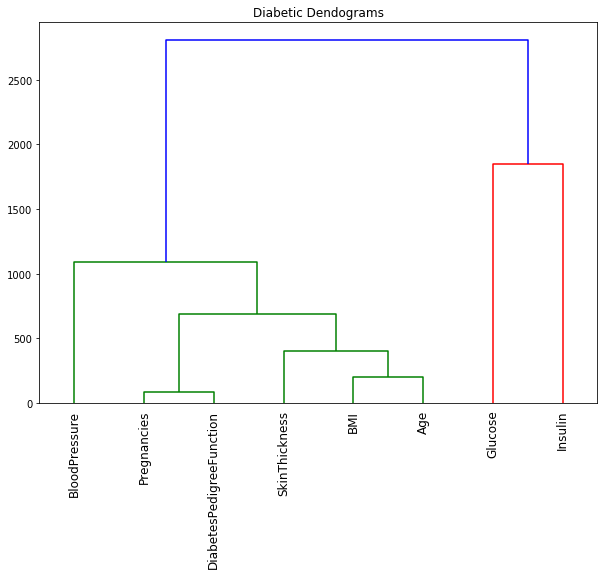

In [52]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Diabetic Dendograms")
dend = shc.dendrogram(shc.linkage(clustering0_df, method='ward'),labels=clustering_df.index)
plt.xticks(rotation=90)
plt.show()

In [44]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_result = cluster.fit_predict(clustering0_df)

In [45]:
den0_df = pd.DataFrame([clustering0_df.index.tolist(),clustering_result.tolist()]).T
den0_df.columns = ['feature_name','cluster']
den0_df.sort_values(by=['cluster'])

,feature_name,cluster
0,Pregnancies,0
2,BloodPressure,0
3,SkinThickness,0
5,BMI,0
6,DiabetesPedigreeFunction,0
7,Age,0
4,Insulin,1
1,Glucose,2


In [46]:
den0_df['feature_name'] = den0_df['feature_name'] + ", "

In [47]:
den0_df.groupby('cluster')['feature_name'].sum()

cluster
0    Pregnancies, BloodPressure, SkinThickness, BMI...
1                                            Insulin, 
2                                            Glucose, 
Name: feature_name, dtype: object

당뇨병환자들에 대해 3개의 군집으로 나눈다면,  
1군집 : BloodPressure, Pregnancies, DiabetesPedigreeFunction, SkinThickness,BMI,Age  
2군집 : glucose  
3군집 : Insulin  
군집화 되는것을 볼 수 있습니다.  
클러스터 분석결과로 당뇨병환자들은 나이가 많을수록 살이 찌기가 쉽고 유전력이 있다는 결과를 얻을 수있습니다.  

#### 정상인들에 대한 클러스터 분석결과

In [55]:
clustering1_df = health_df[health_df.columns[:-2]].T

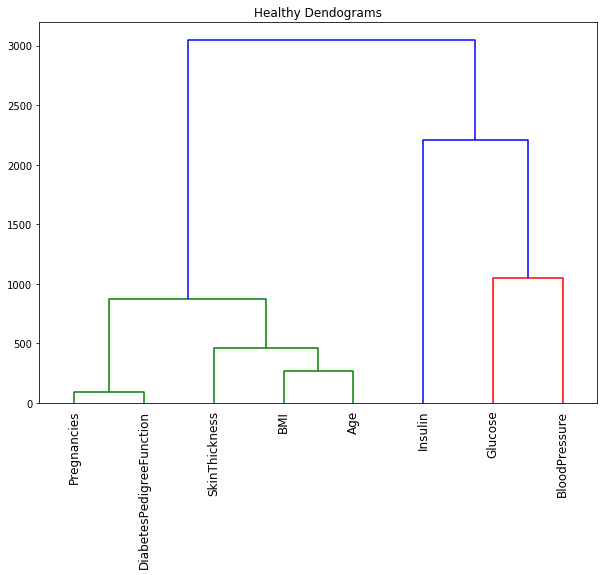

In [56]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Healthy Dendograms")
dend = shc.dendrogram(shc.linkage(clustering1_df, method='ward'),labels=clustering_df.index)
plt.xticks(rotation=90)
plt.show()

In [57]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clustering_result = cluster.fit_predict(clustering1_df)

In [58]:
den1_df = pd.DataFrame([clustering1_df.index.tolist(),clustering_result.tolist()]).T
den1_df.columns = ['feature_name','cluster']
den1_df.sort_values(by=['cluster'])

,feature_name,cluster
1,Glucose,0
2,BloodPressure,0
0,Pregnancies,1
3,SkinThickness,1
5,BMI,1
6,DiabetesPedigreeFunction,1
7,Age,1
4,Insulin,2


In [59]:
den1_df['feature_name'] = den1_df['feature_name'] + ", "

In [60]:
den1_df.groupby('cluster')['feature_name'].sum()

cluster
0                             Glucose, BloodPressure, 
1    Pregnancies, SkinThickness, BMI, DiabetesPedig...
2                                            Insulin, 
Name: feature_name, dtype: object

정상인들에 대해 3개의 군집으로 나눈다면,  
1군집 : Pregnancies, DiabetesPedigreeFunction, SkinThickness,BMI,Age  
2군집 : glucose, BloodPressure  
3군집 : Insulin  
군집화 되는것을 볼 수 있습니다.  

### 결정트리로 특성 중요도 평가
요인 8개가 트리를 만드는 결정에 얼마나 중요한지 평가하는 특성 중요도를 이용했습니다.  
이 값은 0과 1사이의 숫자로, 1에 가까울수록 타깃을 완벽하게 예측했다는 의미입니다.

#### Train/Test셋 나누기

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

#### 결정트리 학습
오버피팅 방지를 위해 길이를 3으로 제한하였습니다

In [73]:
from sklearn.tree import DecisionTreeClassifier  
clf = DecisionTreeClassifier(random_state=0, max_depth = 3)  
clf.fit(X_train, y_train)  
print("train score:",clf.score(X_train, y_train))  
print("test score:",clf.score(X_test, y_test))  

train score: 0.7870967741935484
test score: 0.7521739130434782


In [74]:
fimp_df = pd.DataFrame([X.columns.tolist() , clf.feature_importances_.tolist()]).T
fimp_df.columns = ['feature','importance']

In [75]:
fimp_df

,feature,importance
0,Pregnancies,0
1,Glucose,0.751208
2,BloodPressure,0
3,SkinThickness,0
4,Insulin,0
5,BMI,0.0906888
6,DiabetesPedigreeFunction,0.0894334
7,Age,0.0686697


트리의 특성 중요도 결과 글루코스와 BMI, 연령의 중요도가 높게 측정되었습니다.

### 서포트벡터머신
당뇨병에 대해서 각 요인이 미치는 영향을 조사하기 위해서 서포트백신을 이용해 각요인을 1개씩 제거하여 나머지 7개에 대한 정확도를 측정하였습니다.  
요인의 영향도가 크면 그만큼 7개에 대한 정확도가 낮을 것 입니다.

In [79]:
from sklearn import svm
clf = svm.SVC(gamma='auto',C=0.1)
clf.fit(X_train, y_train)

print("train score:",clf.score(X_train, y_train))  
print("test score:",clf.score(X_test, y_test))  

train score: 0.7591397849462366
test score: 0.7391304347826086


In [81]:
# 1개씩 제외한 피쳐 리스트 작성
col_list = []
for i in range(len(X_scaled.columns)):
    tmp_list = X_scaled.columns.tolist()
    tmp_list.pop(i)
    col_list.append(tmp_list)
print(col_list)

[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'Glucose', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'DiabetesPedigreeFunction', 'Age'], ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age'], ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']]


In [82]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
349,0.682057,-0.361270,-0.599539,0.425277,-0.764427,-1.061537,-0.866450,-0.517458
328,-0.880334,-1.195210,-0.357600,0.163828,0.396448,0.747575,0.085087,-0.428307
33,-0.880334,-0.828277,-0.236630,-0.489792,-0.380834,-1.882479,-0.406840,-0.695759
429,-0.255378,-0.594773,0.247248,-1.339499,-0.764427,-0.377419,-1.171660,-0.071705
354,-1.192812,-1.562144,-4.228622,-1.339499,-0.764427,-1.654439,-0.378114,-0.695759


In [84]:
result = []
for i in range(len(col_list)):
    tmp_X_train = X_train[col_list[i]]
    tmp_X_test = X_test[col_list[i]]
    
    from sklearn import svm
    clf = svm.SVC(gamma='auto',C=0.09)
    clf.fit(tmp_X_train, y_train)
    print("if ", X.columns[i], "is dropped")
    print("train score:",clf.score(tmp_X_train, y_train))  
    print("test score:",clf.score(tmp_X_test, y_test))  
    print("\n")
    result.append((X.columns[i],clf.score(tmp_X_train, y_train)))
    
result

if  Pregnancies is dropped
train score: 0.7440860215053764
test score: 0.7391304347826086


if  Glucose is dropped
train score: 0.6516129032258065
test score: 0.6869565217391305


if  BloodPressure is dropped
train score: 0.7569892473118279
test score: 0.7434782608695653


if  SkinThickness is dropped
train score: 0.7698924731182796
test score: 0.7478260869565218


if  Insulin is dropped
train score: 0.7634408602150538
test score: 0.7391304347826086


if  BMI is dropped
train score: 0.7354838709677419
test score: 0.7478260869565218


if  DiabetesPedigreeFunction is dropped
train score: 0.7462365591397849
test score: 0.7521739130434782


if  Age is dropped
train score: 0.7311827956989247
test score: 0.7478260869565218




[('Pregnancies', 0.7440860215053764),
 ('Glucose', 0.6516129032258065),
 ('BloodPressure', 0.7569892473118279),
 ('SkinThickness', 0.7698924731182796),
 ('Insulin', 0.7634408602150538),
 ('BMI', 0.7354838709677419),
 ('DiabetesPedigreeFunction', 0.7462365591397849),
 ('Age', 0.7311827956989247)]

#### SVM을 이용한 각 Feature에 대한 score 시각화

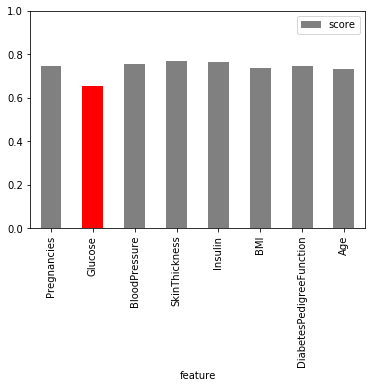

In [85]:
score_df = pd.DataFrame(result)
score_df.columns = ['feature','score']
score_df.plot.bar(x='feature',y='score',color=['gray','red','gray','gray','gray','gray','gray','gray'])
plt.ylim(0,1)
plt.show()

8개의 요인중에 글루코스를 뺀 나머지 7개의 요인에대한 정확도가 약69%로 나오며 다른 요인들과 비교해서 현저히 낮은결과가 나왔습니다.  
당뇨병 환자들한테 있어서 글루코스의 영향도가 크다고 생각 할 수 있습니다. 

## feature조합별 모델별 성능

위에서의 분석결과를 참고하여 글루코스관련요인, 비만관련요인, 연령에 따른 요인이 당뇨병에 있어서 중요한 요인이라고 판단 되었습니다.  
따라서, 3개의 요인들만으로의 성능도를 측정하고 주성분 3개와 전체 성능도와도 비교하였습니다.  
데이터를 랜덤으로 학습용과 검증용 데이터 7:3으로  설정하였습니다.  

### Min-Max scaler사용

In [86]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_mm_scaled = scaler.transform(X)

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_mm_scaled, y, test_size=0.3, random_state=42)

In [88]:
X_train = pd.DataFrame(X_train,columns=X.columns)
X_test = pd.DataFrame(X_test,columns=X.columns)

### 모든feature을 사용한 모델들의 성능평가

#### LinearDiscriminantAnalysis 모델 성능

In [61]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.78417266 0.75539568 0.74820144 0.81294964 0.78417266]
mean score: 0.7769784172661871


#### QuadraticDiscriminantAnalysis 모델 성능

In [62]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.75539568 0.72661871 0.76258993 0.79856115 0.75539568]
mean score: 0.7597122302158275


#### LogisticRegression 모델 성능

In [63]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.76978417 0.71942446 0.75539568 0.8057554  0.78417266]
mean score: 0.766906474820144


#### DecisionTreeClassifier 모델성능

#### gini와 entropy성능비교

In [67]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, criterion='gini',max_depth = 3)
clf.fit(X_train,y_train)
print("train score:",clf.score(X_train, y_train))
print("test score:",clf.score(X_test, y_test))
gini = clf.feature_importances_
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.7880658436213992
test score: 0.7464114832535885
cross validation score: [0.70503597 0.73381295 0.74100719 0.77697842 0.73381295]
mean score: 0.7381294964028776


In [68]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth = 3)
clf.fit(X_train, y_train)
print("train score:",clf.score(X_train, y_train))
print("test score:",clf.score(X_test, y_test))
entropy = clf.feature_importances_
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.7880658436213992
test score: 0.7464114832535885
cross validation score: [0.74100719 0.73381295 0.73381295 0.75539568 0.73381295]
mean score: 0.739568345323741


In [69]:
cart = pd.DataFrame([X.columns, gini,entropy]).T
cart.columns = ['feature','gini','entropy']
cart

,feature,gini,entropy
0,Pregnancies,0,0
1,Glucose,0.761547,0.731995
2,BloodPressure,0,0
3,SkinThickness,0,0
4,Insulin,0,0
5,BMI,0.0869776,0.162912
6,DiabetesPedigreeFunction,0.089068,0.0758209
7,Age,0.0624076,0.0292717


#### KNeighborsClassifier 모델성능

In [71]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=13)
neigh.fit(X_train, y_train)
print("train score:",neigh.score(X_train, y_train))
print("test score:",neigh.score(X_test, y_test))
scores = cross_val_score(neigh, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.7530864197530864
test score: 0.7655502392344498
cross validation score: [0.74820144 0.72661871 0.73381295 0.76258993 0.74100719]
mean score: 0.7424460431654676


#### SupportVectorMachine 모델성능

In [72]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(X_scaled, y)
print("train score:",clf.score(X_train, y_train))
print("test score:",clf.score(X_test, y_test))
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.5164609053497943
test score: 0.49282296650717705
cross validation score: [0.75539568 0.74100719 0.74100719 0.79856115 0.79856115]
mean score: 0.7669064748201438


### 주성분3개의 feature만을 사용한 모델들의 성능평가

In [73]:
#주성분분석
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)
principalComponents = pca.transform(X)

In [74]:
principalDf = pd.DataFrame(data=principalComponents, columns={'com1', 'com2', 'com3'}) 
len(principalDf)

695

In [84]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(principalDf, y, test_size=0.3, random_state=42)

#### LinearDiscriminantAnalysis 모델성능

In [85]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_pca,y_train_pca)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, principalDf, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.70503597 0.72661871 0.70503597 0.77697842 0.78985507]
mean score: 0.740704827442394


####  QuadraticDiscriminantAnalysis 모델성능

In [86]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train_pca,y_train_pca)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.76258993 0.74820144 0.71942446 0.8057554  0.75362319]
mean score: 0.7579188822854759


#### LogisticRegression 모델성능

In [87]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train_pca,y_train_pca)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.77697842 0.76258993 0.75539568 0.82014388 0.78985507]
mean score: 0.7809925972265666


#### KNeighborsClassifier 모델성능

In [88]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=13)
neigh.fit(X_train_pca, y_train_pca)
print("train score:",neigh.score(X_train_pca, y_train_pca))
print("test score:",neigh.score(X_test_pca, y_test_pca))
scores = cross_val_score(neigh, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.7587628865979381
test score: 0.7464114832535885
cross validation score: [0.74820144 0.73381295 0.72661871 0.8057554  0.76086957]
mean score: 0.7550516108852049


#### DecisionTreeClassifier 모델성능

#### gini와 entropy의 성능비교

In [89]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth = 3)
clf.fit(X_train_pca,y_train_pca)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.69064748 0.74820144 0.73381295 0.74100719 0.73913043]
mean score: 0.7305598999061619


In [91]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth = 3)
clf.fit(X_train_pca, y_train_pca)
print("train score:",clf.score(X_train_pca, y_train_pca))
print("test score:",clf.score(X_test_pca, y_test_pca))
entropy = clf.feature_importances_
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.7835051546391752
test score: 0.7559808612440191
cross validation score: [0.74820144 0.74820144 0.73381295 0.73381295 0.74637681]
mean score: 0.7420811177145239


In [92]:
cart = pd.DataFrame([X.columns, gini,entropy]).T
cart.columns = ['feature','gini','entropy']
cart

,feature,gini,entropy
0,Pregnancies,0,0.0322849
1,Glucose,0.908815,0.849261
2,BloodPressure,0.0911845,0.118454
3,SkinThickness,None,None
4,Insulin,None,None
5,BMI,None,None
6,DiabetesPedigreeFunction,None,None
7,Age,None,None


#### SupportVectorMachine 모델성능

In [95]:
from sklearn.svm import SVC

clf = SVC(gamma='auto',C=0.1)
clf.fit(X_train_pca, y_train_pca)
print("train score:",clf.score(X_train_pca, y_train_pca))
print("test score:",clf.score(X_test_pca, y_test_pca))
scores = cross_val_score(clf, X_mm_scaled, y, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.6556701030927835
test score: 0.6842105263157895
cross validation score: [0.66906475 0.6618705  0.6618705  0.6618705  0.66666667]
mean score: 0.6642685851318945


### 유의미한 3개 feature(glucose, BMI, age)만을 사용하여 모델별 성능평가

In [77]:
X_train_3 = X_train[[ 'Glucose', 'BMI', 'Age']]
X_test_3 = X_test[[ 'Glucose', 'BMI', 'Age']]

#### LinearDiscriminantAnalysis 모델성능

In [78]:
#LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_3,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train_3, y_train, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.76530612 0.75257732 0.70103093 0.78350515 0.78350515]
mean score: 0.7571849358300021


LDA의 경우 CV에서 수치가 80이상으로 뛰는 경우가 있어서 robustness한 모델이 아님을 알 수 있다

#### QuadraticDiscriminantAnalysis 모델성능

In [79]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
clf = QuadraticDiscriminantAnalysis()
clf.fit(X_train_3,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train_3, y_train, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.73469388 0.72164948 0.68041237 0.77319588 0.79381443]
mean score: 0.7407532084998948


####  LogisticRegression 모델성능

In [80]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train_3,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train_3,y_train, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.76530612 0.78350515 0.69072165 0.79381443 0.75257732]
mean score: 0.7571849358300021


#### DecisionTreeClassifier 모델성능

#### gini와 entropy의 성능비교

In [82]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, max_depth = 3)
clf.fit(X_train_3,y_train)

from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X_train_3,y_train, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

cross validation score: [0.7755102  0.73195876 0.72164948 0.78350515 0.77319588]
mean score: 0.7571638964864296


In [83]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42, criterion='entropy', max_depth = 3)
clf.fit(X_train_3, y_train)
print("train score:",clf.score(X_train_3, y_train))
print("test score:",clf.score(X_test_3, y_test))
entropy = clf.feature_importances_
scores = cross_val_score(clf, X_train_3,y_train, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.7757201646090535
test score: 0.7368421052631579
cross validation score: [0.7755102  0.73195876 0.72164948 0.64948454 0.77319588]
mean score: 0.7303597727750895


In [84]:
cart = pd.DataFrame([X.columns, gini,entropy]).T
cart.columns = ['feature','gini','entropy']
cart

,feature,gini,entropy
0,Pregnancies,0,0.76748
1,Glucose,0.761547,0.201829
2,BloodPressure,0,0.0306907
3,SkinThickness,0,None
4,Insulin,0,None
5,BMI,0.0869776,None
6,DiabetesPedigreeFunction,0.089068,None
7,Age,0.0624076,None


#### KNeighborsClassifier 모델성능

In [85]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=13)
neigh.fit(X_train_3, y_train)
print("train score:",neigh.score(X_train_3, y_train))
print("test score:",neigh.score(X_test_3, y_test))
scores = cross_val_score(neigh, X_train_3,y_train, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.7880658436213992
test score: 0.7703349282296651
cross validation score: [0.7755102  0.75257732 0.74226804 0.78350515 0.74226804]
mean score: 0.7592257521565327


#### SupportVectorMachine 모델성능

In [87]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

clf =SVC(gamma='auto',C=0.1)
clf.fit(X_train_3, y_train)
print("train score:",clf.score(X_train_3, y_train))
print("test score:",clf.score(X_test_3, y_test))
scores = cross_val_score(clf, X_train_3, y_train, cv=5)
print("cross validation score:",scores)
print("mean score:",scores.mean())

train score: 0.654320987654321
test score: 0.6842105263157895
cross validation score: [0.65306122 0.65979381 0.65979381 0.64948454 0.64948454]
mean score: 0.6543235851041447


## 결과

여러가지 모델을 사용해서 성능도를 측정한 결과 제안한 3개의 요인들만으로도 동등이상의 높은 예측성능도를 얻을 수 있습니다.  
당뇨병에 있어서 이 3개의 요인들이 영향이 크기때문에 주의할 필요가 있습니다.  

# 다시
해결책방향은 자가진단이 가능한지를 
glucose, age, BMI가 간단하게 자가진단이 되는지 
기대할 수 있는 점

당 수치를 측정 하는 혈당 측정기를 통해 자신의 혈당수치를 체크한다
병원에 방문해서 여러가지 검사를 통해 당뇨병을 진단받거나 경과를 지켜보는데 시간이나 돈에 구애를 받는다.
사전에 유의미한 3개의 feature만으로의 자가진단을 통해 직접 방문하지 않고 당뇨병을 체크한다.
자가진단을 통하여 질병의 조기발견이나 상시로 체크할 수 있기때문에 합병증 예방이 될 수 있다.
